In [1]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [2]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=5)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [59]:
# colours = ['#ebe831', '#ffac32', '#ff7259', '#e14a7c', '#9e4091', '#433f8c']
colours = ['#e69500', '#fb6b50', '#e85887', '#b260ac', '#666ab3', '#006a9c']
leg_labels = ['10$^1$K', '10$^2$K', '10$^3$K', '10$^4$K', '10$^5$K', '10$^6$K']

files_ALIM = glob.glob('*ACS.dat')
files_eq_ahfd = glob.glob('*CA_eq_time_AHFD.dat')
files_eq_khfd = glob.glob('*CA_eq_time_KHFD.dat')

ann_data = {}
ahfd_data = {}
khfd_data = {}

for file in files_ALIM:
    ann_data[file.replace('ACS.dat', '')] = pd.read_csv(file, sep="\t", header = None)
for file in files_eq_ahfd:
    ahfd_data[file.replace('CA_eq_time_AHFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
for file in files_eq_khfd:
    khfd_data[file.replace('CA_eq_time_AHFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)

In [60]:
files_eq_ahfd

['d1CA_eq_time_AHFD.dat',
 'd2CA_eq_time_AHFD.dat',
 'd3CA_eq_time_AHFD.dat',
 'd4CA_eq_time_AHFD.dat',
 'd5CA_eq_time_AHFD.dat',
 'd6CA_eq_time_AHFD.dat',
 'd7CA_eq_time_AHFD.dat',
 'd8CA_eq_time_AHFD.dat',
 'd9CA_eq_time_AHFD.dat',
 'd10CA_eq_time_AHFD.dat']

In [87]:
def ann_limits_plots():
    fig, ax = plt.subplots(figsize = (8,6), ncols=3, nrows =3, sharey = True, sharex = True, dpi = 200)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(ann_data['d'+str(i)].columns))[1:]:
                col.loglog(ann_data['d'+str(i)][0], ann_data['d'+str(i)][j], colours[j-1], label = leg_labels[j-1])

            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T_\star$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('ann_fdsup.pdf')

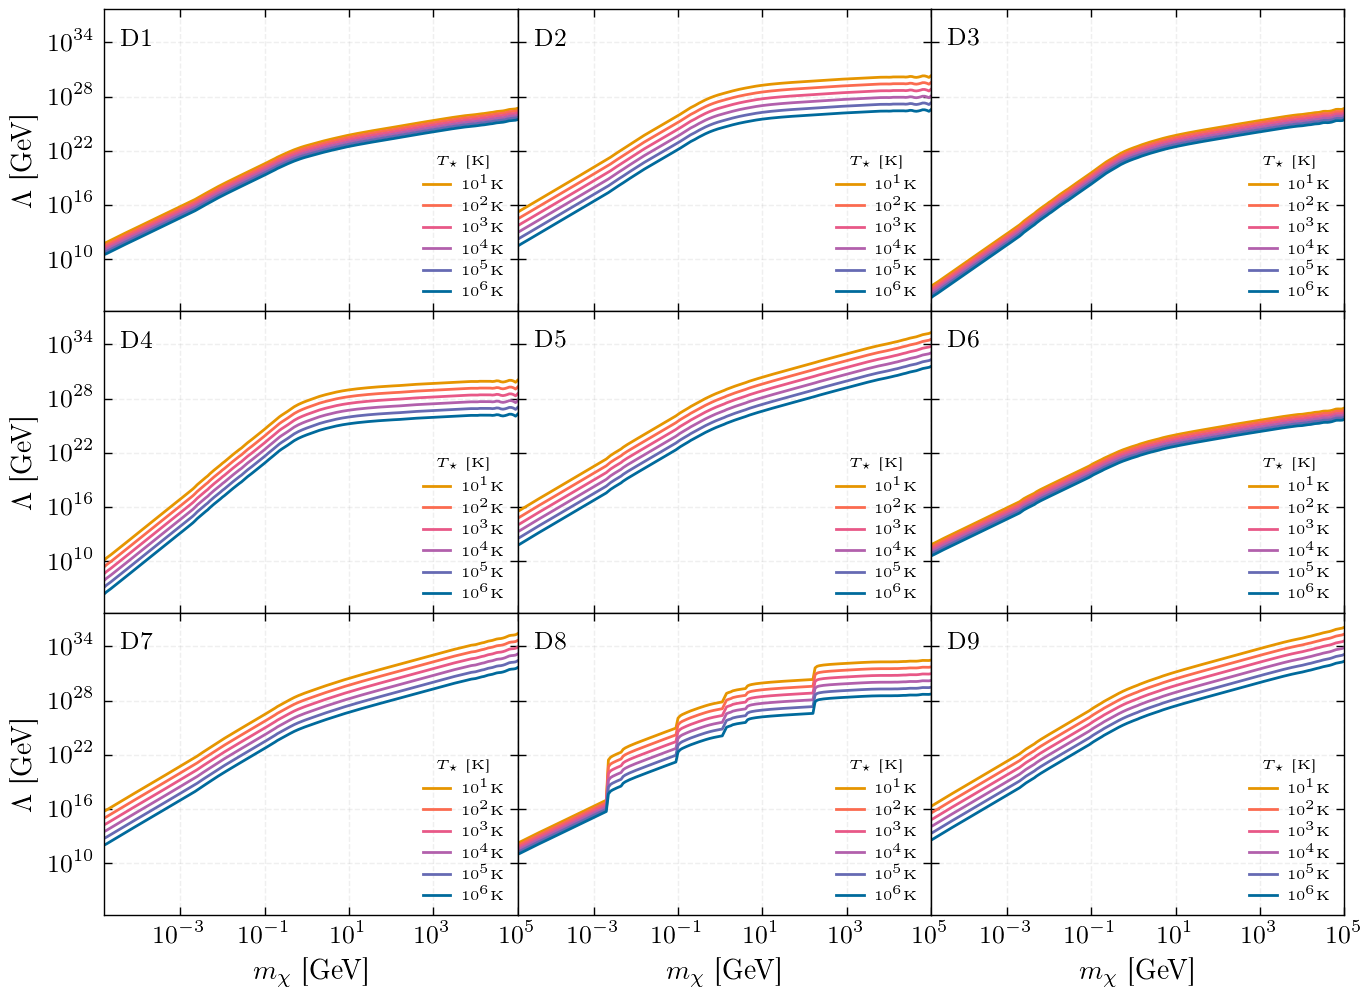

In [88]:
ann_limits_plots()

In [65]:
def CA_eq_times_plots():
    
    labs = ['100 K', '500 K', '1570 K']
    fig, ax = plt.subplots(figsize = (8,6), ncols=3, nrows =3, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(ahfd_data['d'+str(i)].columns))[1:]:
                col.loglog(ahfd_data['d'+str(i)][0], ahfd_data['d'+str(i)][j], colours[j-1], label = labs[j-1])

            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(1e-5, 1e5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = 'T [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\\tau_{eq}$ [s]')
            i+=1
    plt.savefig('ahfd_plots.pdf')

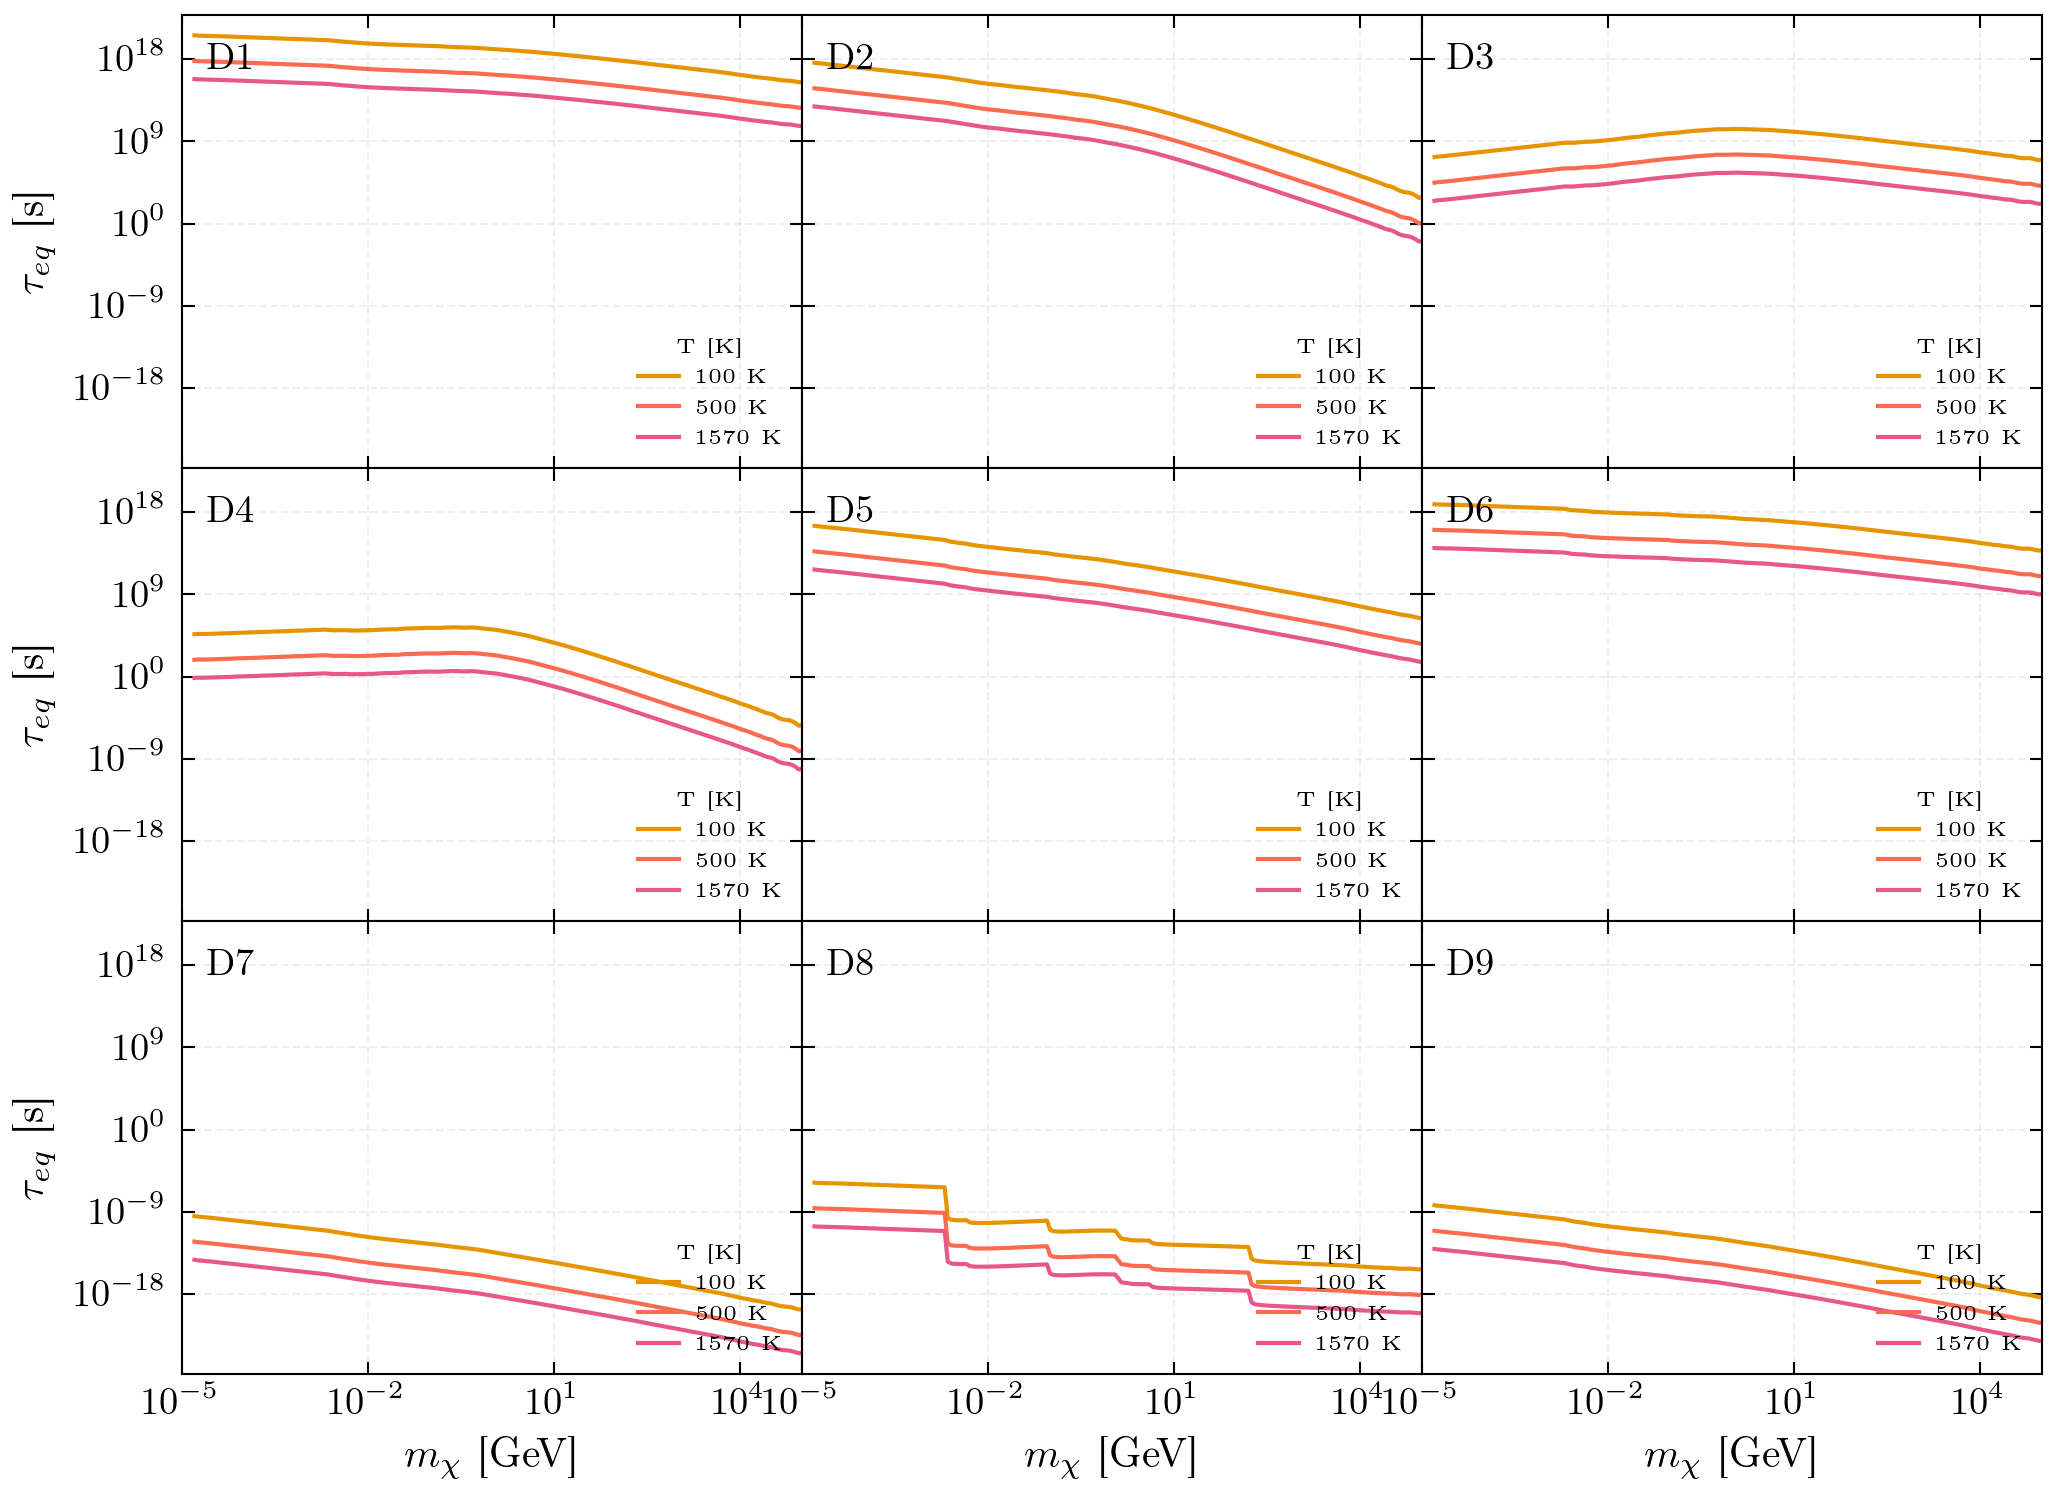

In [66]:
CA_eq_times_plots()